### Welcome to PyOMA

Run the cells below with Shift+Enter

In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

import matplotlib
import sys
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt 

%aimport -sys -logging -matplotlib -matplotlib.pyplot -numpy -pandas - scipy.stats -scipy.stats.qmc

please modify the path below to point to the code directory and run the cell

In [2]:
sys.path.append('/home/sima9999/git/pyOMA')

from pyOMA.core.PreProcessingTools import PreProcessSignals, GeometryProcessor
from pyOMA.core.StabilDiagram import StabilCalc, StabilCluster, StabilPlot
from pyOMA.core.PostProcessingTools import MergePoSER
from pyOMA.core.PlotMSH import ModeShapePlot

from pyOMA.GUI.JupyterGUI import PlotMSHWeb, StabilGUIWeb, SnappingCursor, OutputWidgetHandler, ConfigGUIWeb

please modify the paths and setting below to point to the project and setup directories and run the cell

In [3]:
project_dir = Path('/home/sima9999/git/pyOMA/tests/files/')
nodes_file = project_dir / 'grid.txt'
lines_file = project_dir / 'lines.txt'
parent_child_file = ''

meas_name = 'measurement_1'
setup_dir = project_dir / meas_name
result_dir = setup_dir

setup_info_file = setup_dir / 'setup_info.txt'
meas_file = setup_dir / (meas_name + '.npy')
oma_conf_file = project_dir / 'varssi_config.txt'
chan_dofs_file = setup_dir / "channel_dofs.txt"

skip_existing=True
save_results=False

PreProcessSignals.load_measurement_file = np.load

In [4]:
display(ConfigGUIWeb(locals()))

In [5]:
geometry_data = GeometryProcessor.load_geometry(
    nodes_file=nodes_file,
    lines_file=lines_file,
    parent_childs_file=parent_child_file)

In [6]:
if not os.path.exists(setup_dir / 
        'prep_data.npz') or not skip_existing:
    prep_data = PreProcessSignals.init_from_config(
        conf_file=setup_info_file,
        meas_file=meas_file,
        chan_dofs_file=chan_dofs_file)

    if save_results:
        prep_data.save_state(result_dir / 'prep_data.npz')
else:
    prep_data = PreProcessSignals.load_state(result_dir / 'prep_data.npz')

INFO:pyOMA.core.PreProcessingTools:Now loading previous results from  /home/sima9999/git/pyOMA/tests/files/measurement_1/prep_data.npz


In [7]:
if not os.path.exists(result_dir /
        'modal_data.npz') or not skip_existing:

    modal_data = method.init_from_config(oma_conf_file, prep_data)

    if save_results:
        modal_data.save_state(result_dir / 'modal_data.npz')
else:
    modal_data = method.load_state(
        result_dir / 'modal_data.npz', prep_data)

Now loading previous results from  /home/sima9999/git/pyOMA/tests/files/measurement_1/modal_data.npz
Covariance Matrices Built
State Matrices Computed
Modal Parameters Computed


In [8]:
if os.path.exists(result_dir 
                  / 'stabil_data.npz') and skip_existing:
    stabil_calc = StabilCalc.load_state(
        result_dir / 'stabil_data.npz', modal_data, prep_data)
else:
    stabil_calc = StabilCalc(modal_data, prep_data)
stabil_plot = StabilPlot(stabil_calc)

Now loading previous results from  /home/sima9999/git/pyOMA/tests/files/measurement_1/stabil_data.npz


In [9]:
display(StabilGUIWeb(stabil_plot))

In [10]:
if save_results:
    stabil_calc.save_state(result_dir / 'stabil_data.npz')

In [10]:
mode_shape_plot = ModeShapePlot(amplitude=10,
                                prep_data=prep_data,
                                stabil_calc=stabil_calc,
                                geometry_data=geometry_data,
                                modal_data=modal_data)

In [11]:
display(PlotMSHWeb(mode_shape_plot))

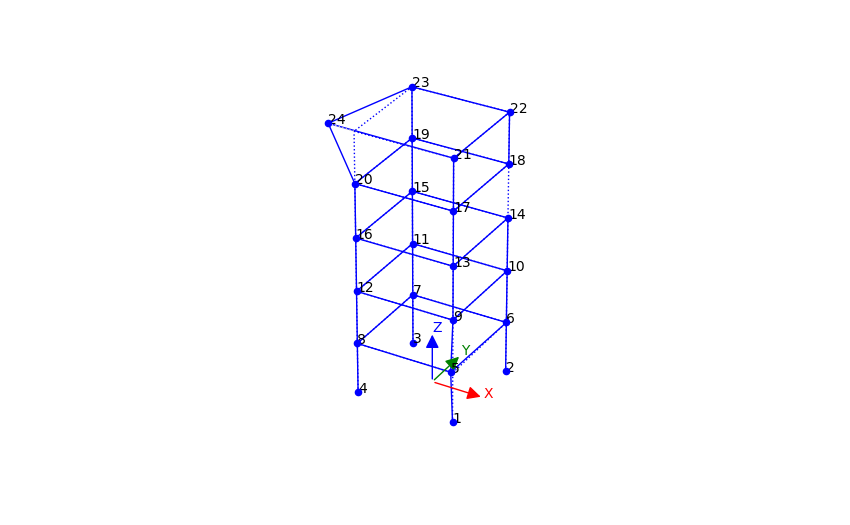

In [12]:
mode_shape_plot.fig.canvas